<a href="https://colab.research.google.com/github/sunha-park/mining/blob/main/EI_DA_TV_Shipment_Analysis_A%EC%A1%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## [EI-DA 전자산업 데이터분석]  TV Shipment Analysis

**<div style="text-align: right">Update date: May 6, 2021.</div>**
**<div style="text-align: right">Copyright(c) 2021-2022 Youngmin Park All rights reserved.</div>**

**"CONFIDENTIAL.TV_shipment_20210716.csv" : 지역별 TV 선적 실적에 대한 데이터**

## 라이브러리 임포트

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

plt.rcParams['font.family'] = ['NanumBarunGothic', 'Malgun Gothic', 'AppleGothic']  # 한글 출력을 위한 글꼴 설정
plt.rcParams['axes.unicode_minus'] = False    # 문자 - (마이너스) 정상 출력을 위한 코드

## 데이터 불러오기 

In [ ]:
rawdata_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DataVisualization_python/data/CONFIDENTIAL.TV_shipment_20210716.csv', index_col=0)

In [ ]:
rawdata_df

,2016,2017,2018,2019,2020,2021E,2022E,2023E
Quantity (000s),,,,,,,,
Japan,5043.7720,4960.90800,5240.52200,5556.387,6294.62800,6600.00000,5800.00000,5300.00000
North America,43524.0868,41637.51744,43892.53100,42531.892,51937.45599,47482.00000,40700.00000,42200.00000
Western Europe,29939.5740,29377.95200,29135.49558,30145.910,31027.11100,32218.00000,30273.00000,28550.00000
Eastern Europe,14570.6360,14729.26500,15483.14075,16537.124,17286.47700,16709.00000,16775.00000,15921.00000
China,59789.2100,53685.85100,54533.15000,53108.499,47375.80600,46168.00000,47316.00000,49383.00000
Asia & Oceania,33598.6320,34464.87500,36690.49400,38091.309,34235.02700,35216.00000,37258.00000,38674.00000
Latin America & the Caribbean,22221.2340,23221.78907,24165.89400,24492.926,24164.51800,25288.00000,25381.00000,24160.00000
Middle East & Africa,14049.6300,13094.31100,12221.69500,12450.704,13148.90900,13376.40372,13866.43992,13159.70298
Total,222736.7748,215172.46850,221362.92230,222914.751,225469.93200,223057.40370,217369.43990,217347.70300


In [ ]:
rawdata_df.T

Quantity (000s),Japan,North America,Western Europe,Eastern Europe,China,Asia & Oceania,Latin America & the Caribbean,Middle East & Africa,Total
2016,5043.772,43524.08680,29939.57400,14570.63600,59789.210,33598.632,22221.23400,14049.63000,222736.7748
2017,4960.908,41637.51744,29377.95200,14729.26500,53685.851,34464.875,23221.78907,13094.31100,215172.4685
2018,5240.522,43892.53100,29135.49558,15483.14075,54533.150,36690.494,24165.89400,12221.69500,221362.9223
2019,5556.387,42531.89200,30145.91000,16537.12400,53108.499,38091.309,24492.92600,12450.70400,222914.7510
2020,6294.628,51937.45599,31027.11100,17286.47700,47375.806,34235.027,24164.51800,13148.90900,225469.9320
2021E,6600.000,47482.00000,32218.00000,16709.00000,46168.000,35216.000,25288.00000,13376.40372,223057.4037
2022E,5800.000,40700.00000,30273.00000,16775.00000,47316.000,37258.000,25381.00000,13866.43992,217369.4399
2023E,5300.000,42200.00000,28550.00000,15921.00000,49383.000,38674.000,24160.00000,13159.70298,217347.7030


## EDA 탐색적 데이터 분석 수행하기

In [ ]:
# Total 행을 제거한 dataframe을 새로 할당
shipment_graph_df = rawdata_df.drop(index='Total')
shipment_graph_df

,2016,2017,2018,2019,2020,2021E,2022E,2023E
Quantity (000s),,,,,,,,
Japan,5043.7720,4960.90800,5240.52200,5556.387,6294.62800,6600.00000,5800.00000,5300.00000
North America,43524.0868,41637.51744,43892.53100,42531.892,51937.45599,47482.00000,40700.00000,42200.00000
Western Europe,29939.5740,29377.95200,29135.49558,30145.910,31027.11100,32218.00000,30273.00000,28550.00000
Eastern Europe,14570.6360,14729.26500,15483.14075,16537.124,17286.47700,16709.00000,16775.00000,15921.00000
China,59789.2100,53685.85100,54533.15000,53108.499,47375.80600,46168.00000,47316.00000,49383.00000
Asia & Oceania,33598.6320,34464.87500,36690.49400,38091.309,34235.02700,35216.00000,37258.00000,38674.00000
Latin America & the Caribbean,22221.2340,23221.78907,24165.89400,24492.926,24164.51800,25288.00000,25381.00000,24160.00000
Middle East & Africa,14049.6300,13094.31100,12221.69500,12450.704,13148.90900,13376.40372,13866.43992,13159.70298


In [ ]:
shipment_graph_df

,2016,2017,2018,2019,2020,2021E,2022E,2023E
Quantity (000s),,,,,,,,
Japan,5043.7720,4960.90800,5240.52200,5556.387,6294.62800,6600.00000,5800.00000,5300.00000
North America,43524.0868,41637.51744,43892.53100,42531.892,51937.45599,47482.00000,40700.00000,42200.00000
Western Europe,29939.5740,29377.95200,29135.49558,30145.910,31027.11100,32218.00000,30273.00000,28550.00000
Eastern Europe,14570.6360,14729.26500,15483.14075,16537.124,17286.47700,16709.00000,16775.00000,15921.00000
China,59789.2100,53685.85100,54533.15000,53108.499,47375.80600,46168.00000,47316.00000,49383.00000
Asia & Oceania,33598.6320,34464.87500,36690.49400,38091.309,34235.02700,35216.00000,37258.00000,38674.00000
Latin America & the Caribbean,22221.2340,23221.78907,24165.89400,24492.926,24164.51800,25288.00000,25381.00000,24160.00000
Middle East & Africa,14049.6300,13094.31100,12221.69500,12450.704,13148.90900,13376.40372,13866.43992,13159.70298


In [ ]:
shipment_graph_df_T = shipment_graph_df.T
shipment_graph_df_T

Quantity (000s),Japan,North America,Western Europe,Eastern Europe,China,Asia & Oceania,Latin America & the Caribbean,Middle East & Africa
2016,5043.772,43524.08680,29939.57400,14570.63600,59789.210,33598.632,22221.23400,14049.63000
2017,4960.908,41637.51744,29377.95200,14729.26500,53685.851,34464.875,23221.78907,13094.31100
2018,5240.522,43892.53100,29135.49558,15483.14075,54533.150,36690.494,24165.89400,12221.69500
2019,5556.387,42531.89200,30145.91000,16537.12400,53108.499,38091.309,24492.92600,12450.70400
2020,6294.628,51937.45599,31027.11100,17286.47700,47375.806,34235.027,24164.51800,13148.90900
2021E,6600.000,47482.00000,32218.00000,16709.00000,46168.000,35216.000,25288.00000,13376.40372
2022E,5800.000,40700.00000,30273.00000,16775.00000,47316.000,37258.000,25381.00000,13866.43992
2023E,5300.000,42200.00000,28550.00000,15921.00000,49383.000,38674.000,24160.00000,13159.70298


## 데이터 분석 해보기

데이터 분석을 본격적으로 진행해보겠습니다.  
데이터 분석에서는 기존의 데이터를 가공하여 새로운 관찰을 하고는 합니다.  
각 지역의 시장 성장을 비교하기 위해 시계열 수치들을 첫 년도의 수치로 나누어봅니다.

첫 년도 (2016) 대비 선적 수치의 비율 (성장률)을 그려봅니다

In [ ]:
shipment_graph_df_T

Quantity (000s),Japan,North America,Western Europe,Eastern Europe,China,Asia & Oceania,Latin America & the Caribbean,Middle East & Africa
2016,5043.772,43524.08680,29939.57400,14570.63600,59789.210,33598.632,22221.23400,14049.63000
2017,4960.908,41637.51744,29377.95200,14729.26500,53685.851,34464.875,23221.78907,13094.31100
2018,5240.522,43892.53100,29135.49558,15483.14075,54533.150,36690.494,24165.89400,12221.69500
2019,5556.387,42531.89200,30145.91000,16537.12400,53108.499,38091.309,24492.92600,12450.70400
2020,6294.628,51937.45599,31027.11100,17286.47700,47375.806,34235.027,24164.51800,13148.90900
2021E,6600.000,47482.00000,32218.00000,16709.00000,46168.000,35216.000,25288.00000,13376.40372
2022E,5800.000,40700.00000,30273.00000,16775.00000,47316.000,37258.000,25381.00000,13866.43992
2023E,5300.000,42200.00000,28550.00000,15921.00000,49383.000,38674.000,24160.00000,13159.70298


In [ ]:
shipment_graph_df_T.diff()

Quantity (000s),Japan,North America,Western Europe,Eastern Europe,China,Asia & Oceania,Latin America & the Caribbean,Middle East & Africa
2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017,-82.864,-1886.56936,-561.62200,158.62900,-6103.359,866.243,1000.55507,-955.31900
2018,279.614,2255.01356,-242.45642,753.87575,847.299,2225.619,944.10493,-872.61600
2019,315.865,-1360.63900,1010.41442,1053.98325,-1424.651,1400.815,327.03200,229.00900
2020,738.241,9405.56399,881.20100,749.35300,-5732.693,-3856.282,-328.40800,698.20500
2021E,305.372,-4455.45599,1190.88900,-577.47700,-1207.806,980.973,1123.48200,227.49472
2022E,-800.000,-6782.00000,-1945.00000,66.00000,1148.000,2042.000,93.00000,490.03620
2023E,-500.000,1500.00000,-1723.00000,-854.00000,2067.000,1416.000,-1221.00000,-706.73694


In [ ]:
shipment_graph_df_T

Quantity (000s),Japan,North America,Western Europe,Eastern Europe,China,Asia & Oceania,Latin America & the Caribbean,Middle East & Africa
2016,5043.772,43524.08680,29939.57400,14570.63600,59789.210,33598.632,22221.23400,14049.63000
2017,4960.908,41637.51744,29377.95200,14729.26500,53685.851,34464.875,23221.78907,13094.31100
2018,5240.522,43892.53100,29135.49558,15483.14075,54533.150,36690.494,24165.89400,12221.69500
2019,5556.387,42531.89200,30145.91000,16537.12400,53108.499,38091.309,24492.92600,12450.70400
2020,6294.628,51937.45599,31027.11100,17286.47700,47375.806,34235.027,24164.51800,13148.90900
2021E,6600.000,47482.00000,32218.00000,16709.00000,46168.000,35216.000,25288.00000,13376.40372
2022E,5800.000,40700.00000,30273.00000,16775.00000,47316.000,37258.000,25381.00000,13866.43992
2023E,5300.000,42200.00000,28550.00000,15921.00000,49383.000,38674.000,24160.00000,13159.70298


In [ ]:
shipment_graph_df_T.pct_change()

Quantity (000s),Japan,North America,Western Europe,Eastern Europe,China,Asia & Oceania,Latin America & the Caribbean,Middle East & Africa
2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017,-0.016429,-0.043345,-0.018759,0.010887,-0.102081,0.025782,0.045027,-0.067996
2018,0.056363,0.054158,-0.008253,0.051182,0.015783,0.064576,0.040656,-0.066641
2019,0.060274,-0.030999,0.034680,0.068073,-0.026124,0.038179,0.013533,0.018738
2020,0.132863,0.221141,0.029231,0.045313,-0.107943,-0.101238,-0.013408,0.056078
2021E,0.048513,-0.085785,0.038382,-0.033406,-0.025494,0.028654,0.046493,0.017301
2022E,-0.121212,-0.142833,-0.060370,0.003950,0.024866,0.057985,0.003678,0.036634
2023E,-0.086207,0.036855,-0.056915,-0.050909,0.043685,0.038005,-0.048107,-0.050967


# Team activity (A조)

###문제1

####bar chart

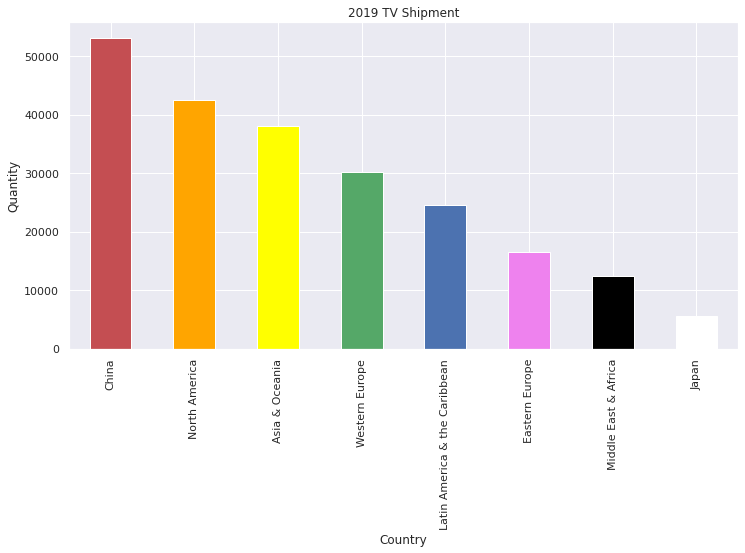

In [ ]:
shipment_graph_df['2019'].sort_values(ascending=False).plot(figsize=(12,6), kind='bar', title='2019 TV Shipment', color=['r','orange','yellow','g','b','violet','black','white'])
plt.xlabel('Country')
plt.ylabel('Quantity')
plt.show();

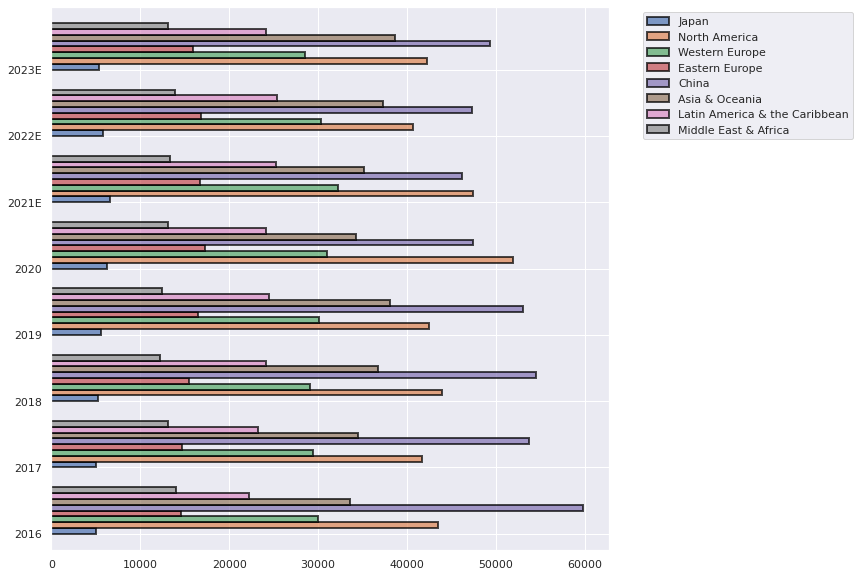

In [ ]:
shipment_graph_df_T.plot(figsize=(10,10),kind='barh',width=0.7,alpha=0.7,align='edge',edgecolor='black',linewidth='2')
plt.legend(bbox_to_anchor=(1.05,1))

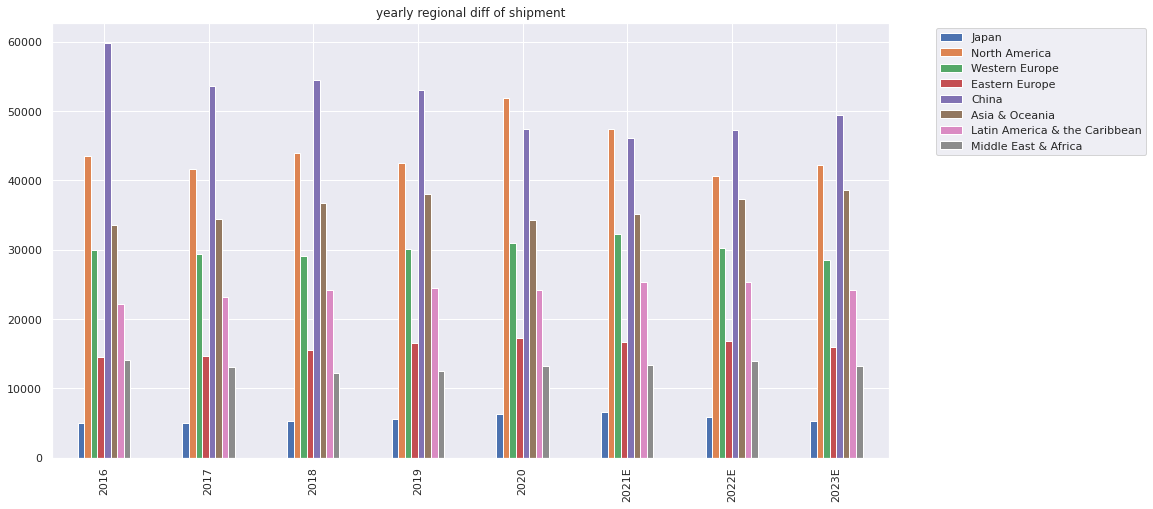

In [ ]:
shipment_graph_df_T.plot(figsize=(15,8), kind='bar');
plt.legend(bbox_to_anchor=(1.05,1));
plt.title('yearly regional diff of shipment');

####heatmap
중앙값으로 45000을 설정했기 때문에 45000은 검은색이 되고 45000보다 크면 붉은색,45000보다 작으면 푸른색으로 표시됨.

findfont: Font family ['NanumBarunGothic', 'Malgun Gothic', 'AppleGothic'] not found. Falling back to DejaVu Sans.


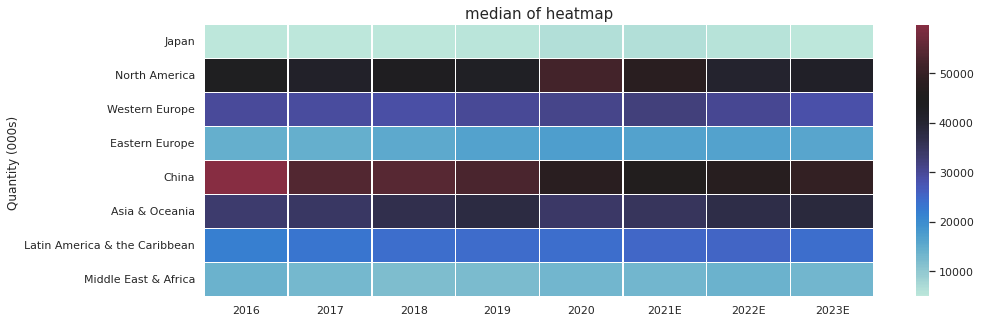

In [ ]:
plt.figure(figsize=(15,5))
plt.title('median of heatmap',fontsize=15)
sns.heatmap(shipment_graph_df,center=45000,linewidths=0.5)
plt.show()

###문제2

####bar chart

In [ ]:
shipment_graph_df_int=shipment_graph_df.round(0).astype(int)
shipment_graph_df_int

,2016,2017,2018,2019,2020,2021E,2022E,2023E
Quantity (000s),,,,,,,,
Japan,5044,4961,5241,5556,6295,6600,5800,5300
North America,43524,41638,43893,42532,51937,47482,40700,42200
Western Europe,29940,29378,29135,30146,31027,32218,30273,28550
Eastern Europe,14571,14729,15483,16537,17286,16709,16775,15921
China,59789,53686,54533,53108,47376,46168,47316,49383
Asia & Oceania,33599,34465,36690,38091,34235,35216,37258,38674
Latin America & the Caribbean,22221,23222,24166,24493,24165,25288,25381,24160
Middle East & Africa,14050,13094,12222,12451,13149,13376,13866,13160


Text(0.5, 1.0, 'Sales quantity by country')

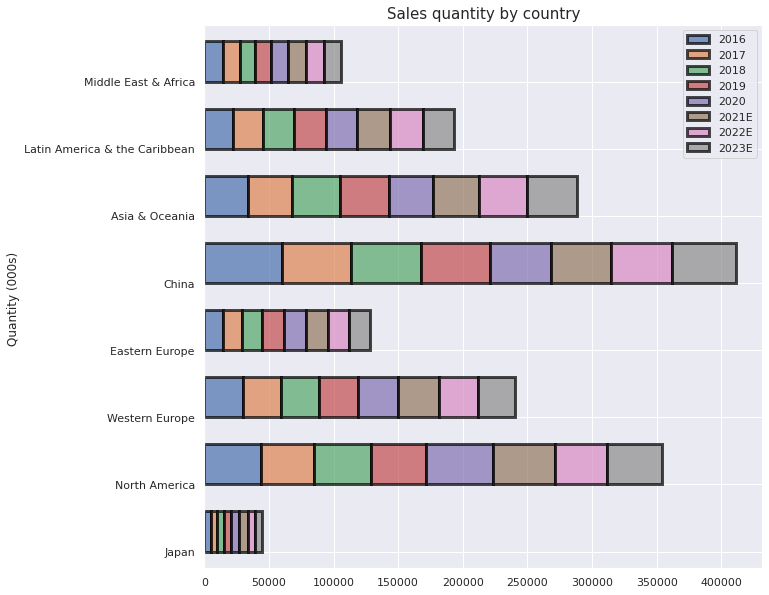

In [ ]:
shipment_graph_df_int.plot(figsize=(10,10),kind = 'barh',stacked=True,alpha=0.7,width=0.6,align='edge',edgecolor='black',linewidth='3')
plt.title('Sales quantity by country',fontsize=15)

##문제3

####가정 & 목표 

가정) 기존 TV 선적회사 +  TV 판매사업까지 확장 진출 계획

목표) 성장변화에 따른 집중 현지화 및 shipment 비용 증가로 인한 수익모델 전략 구축

####분석 : pyplot 을 통한 데이터 시각화

step1 연도별 국가별의 총 선적수량에 대한 그래프를 통해서 시장을 확인해 보았다.

Text(0.5, 1.0, 'Total Quantity')

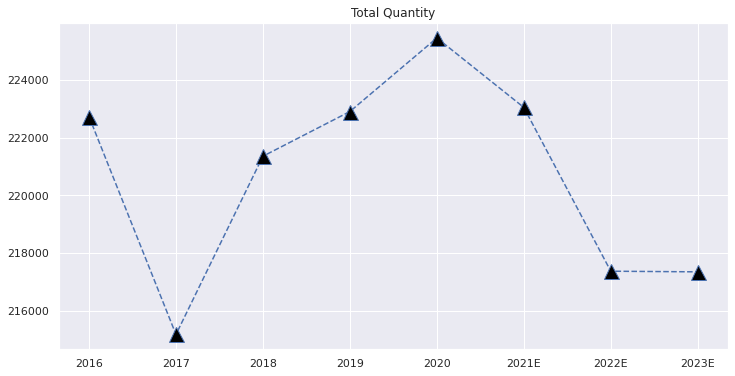

In [ ]:
total_graph_df_int=rawdata_df.astype(int)
total_graph_df_int

total_graph_df_int.T

total_graph_df_int.T['Total'].plot(figsize=(12,6),linestyle='--',marker='^',markerfacecolor='black',markersize=15)

plt.title('Total Quantity')

전체 시장을 확인해보니 2016, 2019년도 때의 변화가 두드러진 것을 확인해보니 신제품을 3년마다 출시를 하는 추세를 보이는 것으로 예상된다.

step2 더 자세히 분석하기 위해 3년 간 국가별 성장 변화에 대해 비교를 해봤다. 

<function matplotlib.pyplot.show>

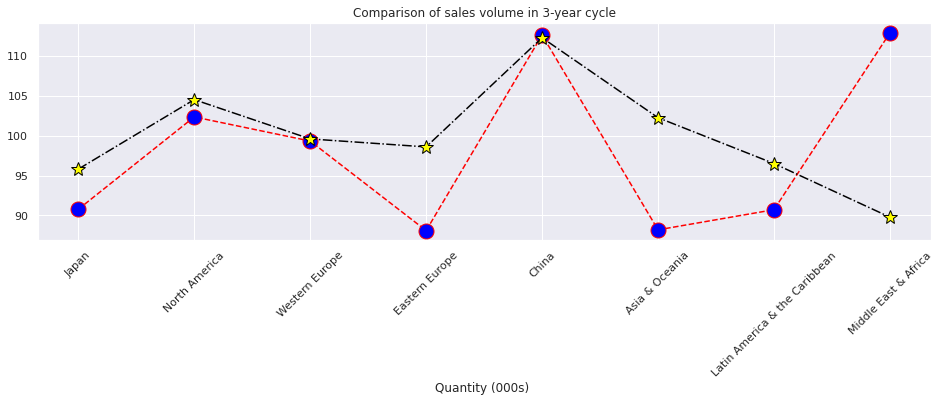

In [ ]:
df5=shipment_graph_df['2016']/shipment_graph_df['2019']*100 #2016년 대비 2019년도의 변화율
df6=df5.plot(figsize=(16,5),color='red',rot=45,linestyle='dashed',marker='o',markerfacecolor='blue',markersize=15)


df7=shipment_graph_df['2019']/shipment_graph_df['2022E']*100 #2019년도 대비 2022E년 성장변화율
df8=df7.plot(figsize=(16,4),color='black',rot=45,linestyle='dashdot',marker='*',markerfacecolor='yellow',markersize=15)
plt.title('Comparison of sales volume in 3-year cycle')
plt.show

3년간 성장 변화를 분석했을 때, 아시아 & 오세아니아 가 양(+)으로 성장 변화가 크며
중동 & 아프리카가 음(-)으로 성장 변화가 큰 것을 알 수 있다.

Step 3 중동&아프리카 지역과 아시아&오세아니아국가의 년도별 선적수량의 변화를 보았다.

Text(0.5, 1.0, 'Comparison of two countries')

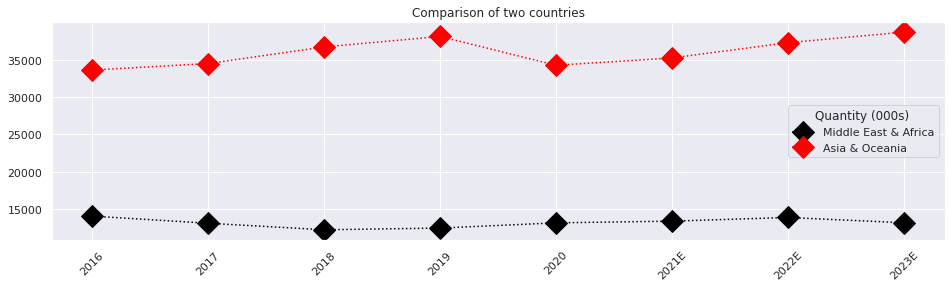

In [ ]:
shipment_graph_df_T[['Middle East & Africa','Asia & Oceania']].plot(figsize=(16,4),color=['black','red'],rot=45,linestyle=':',marker="D",markersize=15)

plt.title('Comparison of two countries')

###결론

 중동지역 & 아프리카 국가와 아시아& 오세아니아 국가의 년도별 선적수량 변화를 확인해 본 결과, 새로운 TV 진출 지역으로 선정하고
중동지역 및 아프리카 국가 기존 선적 사업의 shipment 비용을 증가하는 전략을 세워 수익을 창출한다.


